In [1]:
import geopandas as gpd
import pandas as pd

df = pd.read_csv("../data/nhgis0001_ds258_2020_blck_grp.csv", encoding='ISO-8859-1')
print(df)

                GISJOIN  YEAR STUSAB                  GEOID       GEOCODE  \
0       G01000100201001  2020     AL  1500000US010010201001   10010201001   
1       G01000100201002  2020     AL  1500000US010010201002   10010201002   
2       G01000100202001  2020     AL  1500000US010010202001   10010202001   
3       G01000100202002  2020     AL  1500000US010010202002   10010202002   
4       G01000100203001  2020     AL  1500000US010010203001   10010203001   
...                 ...   ...    ...                    ...           ...   
242330  G72015307506011  2020     PR  1500000US721537506011  721537506011   
242331  G72015307506012  2020     PR  1500000US721537506012  721537506012   
242332  G72015307506013  2020     PR  1500000US721537506013  721537506013   
242333  G72015307506021  2020     PR  1500000US721537506021  721537506021   
242334  G72015307506022  2020     PR  1500000US721537506022  721537506022   

        REGIONA  DIVISIONA        STATE  STATEA           COUNTY  ...  \
0 

In [2]:
bg = df.loc[(~df.GEOCODE.astype(str).str.startswith('72')) ]
print(bg)

                GISJOIN  YEAR STUSAB                  GEOID       GEOCODE  \
0       G01000100201001  2020     AL  1500000US010010201001   10010201001   
1       G01000100201002  2020     AL  1500000US010010201002   10010201002   
2       G01000100202001  2020     AL  1500000US010010202001   10010202001   
3       G01000100202002  2020     AL  1500000US010010202002   10010202002   
4       G01000100203001  2020     AL  1500000US010010203001   10010203001   
...                 ...   ...    ...                    ...           ...   
239775  G56004509511001  2020     WY  1500000US560459511001  560459511001   
239776  G56004509511002  2020     WY  1500000US560459511002  560459511002   
239777  G56004509513001  2020     WY  1500000US560459513001  560459513001   
239778  G56004509513002  2020     WY  1500000US560459513002  560459513002   
239779  G56004509513003  2020     WY  1500000US560459513003  560459513003   

        REGIONA  DIVISIONA    STATE  STATEA          COUNTY  ...    AREALAN

In [3]:
rural = pd.read_csv('../data/rural_fp_regression.csv')
merged_df = rural.merge(bg, left_on='bg_fips', right_on='GEOCODE', how='left')
print(merged_df)

            bg_fips                                   address  distance_mi  \
0       10059501001      111 Jackson Street Eufaula, AL 36072     4.921180   
1       10059501002      111 Jackson Street Eufaula, AL 36072    11.686954   
2       10059502001  11 East College Street Clayton, AL 36016     5.718206   
3       10059502002             276 AL-239, Clayton, AL 36016     4.960451   
4       10059502003  11 East College Street Clayton, AL 36016     3.365542   
...             ...                                       ...          ...   
41008  560430002003                                       NaN          NaN   
41009  560459511002                                       NaN          NaN   
41010  560459513001                                       NaN          NaN   
41011  560459513002                                       NaN          NaN   
41012  560459513003                                       NaN          NaN   

       transit_time  walking_time driving_distance_km  ADI_NATR

In [4]:
print(merged_df['AREALAND'].describe())

count    4.101300e+04
mean     1.613134e+08
std      1.437987e+09
min      0.000000e+00
25%      3.462313e+06
50%      2.452540e+07
75%      8.877007e+07
max      1.583998e+11
Name: AREALAND, dtype: float64


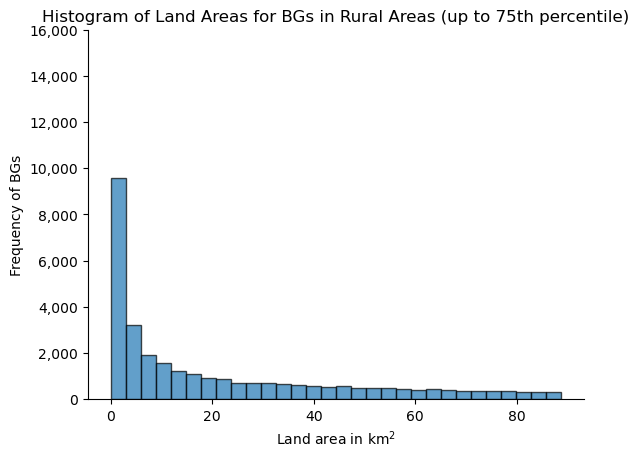

In [6]:
import matplotlib.pyplot as plt
import numpy as np
merged_df['AREALAND_km2'] = merged_df['AREALAND']/1000000
from matplotlib.ticker import FuncFormatter
def add_commas(x, pos):
    return f'{int(x):,}'

plt.hist(merged_df['AREALAND_km2'], bins=30, range=[0, merged_df['AREALAND_km2'].quantile(0.75)], edgecolor='k', alpha=0.7)
formatter = FuncFormatter(add_commas)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Histogram of Land Areas for BGs in Rural Areas (up to 75th percentile)')
plt.xlabel('Land area in km$^{2}$')
plt.ylabel('Frequency of BGs')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0, 16000)
plt.show()

In [7]:
metro = pd.read_csv('../data/metro_fp_regression.csv')
metro_merged =  metro.merge(bg, left_on='bg_fips', right_on='GEOCODE', how='left')
print(metro_merged)

             bg_fips                                        address  \
0        40130405022     360 W. Yavapai Street Wickenburg, AZ 85390   
1        40130405024     360 W. Yavapai Street Wickenburg, AZ 85390   
2        40159501021    280 W Township Ave, Colorado City, AZ 86021   
3        50690010001             500 S Main St Pine Bluff, AR 71601   
4       120210111071  101 S Copeland Ave, Everglades City, FL 34139   
...              ...                                            ...   
198762  560250016031      4301 Casper Mountain Rd, Casper, WY 82601   
198763  560250017003        4250 Poison Spider Road MIlls, WY 82644   
198764  560250018011              411 S. Walsh Dr. Casper, WY 82609   
198765  560250018012      4301 Casper Mountain Rd, Casper, WY 82601   
198766  560250018022                 4976 Paige St Casper, WY 82604   

        distance_mi  transit_time  walking_time driving_distance_km  \
0          0.540367           NaN     14.700000               1.285   
1    

In [8]:
print(metro_merged['AREALAND'].describe())

count    1.987670e+05
mean     1.275151e+07
std      1.472226e+08
min      0.000000e+00
25%      4.323865e+05
50%      9.896560e+05
75%      3.344785e+06
max      3.666123e+10
Name: AREALAND, dtype: float64


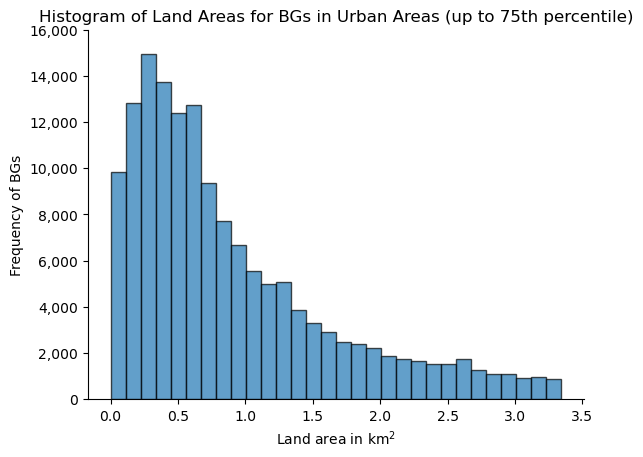

In [9]:
metro_merged['AREALAND_km2'] = metro_merged['AREALAND']/1000000
plt.hist(metro_merged['AREALAND_km2'], bins=30, range=[0, metro_merged['AREALAND_km2'].quantile(0.75)], edgecolor='k', alpha=0.7)
formatter = FuncFormatter(add_commas)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Histogram of Land Areas for BGs in Urban Areas (up to 75th percentile)')
plt.xlabel('Land area in km$^{2}$')
plt.ylabel('Frequency of BGs')
plt.ylim(0, 16000)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()